# Monetary Economics: Chapter 12

### Preliminaries

In [76]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

#from ipywidgets import *
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import matplotlib.pyplot as plt

In [77]:

slider = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=1.0,
    step=0.01,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)
display(slider)

In [78]:
gamma2bla = slider.value

### Model OPENFIX

In [79]:
def create_openfix_model():
    model = Model()
        
    model.set_var_default(0)
    model.set_param_default(0)
    model.var('BdUKUK', desc='Bills issued by the UK acquired by the UK: demand')
    model.var('BsUKUK', desc='Bills issued by the UK acquired by the UK: supply')
    model.var('BcbdUKUS', desc='Bills issued by the US, demanded by the UK central bank')
    model.var('BcbsUKUS', desc='Bills issued by the US, supplied to the UK central bank')
    model.var('BcbdUKUK', desc='Bills issued by the UK, demanded by the UK central bank')
    model.var('BcbsUKUK', desc='Bills issued by the UK, supplied to the UK central bank')
    model.var('BsUK', desc='Bills issued by the UK - total supply')
    model.var('BdUKUS', desc='Bills issued by the US acquired by the UK: demand')
    model.var('BsUKUS', desc='Bills issued by the US acquired by the UK: supply')
    model.var('BdUSUK', desc='Bills issued by the UK acquired by the US: demand')
    model.var('BsUSUK', desc='Bills issued by the UK acquired by the US: supply')
    model.var('BsUS', desc='Bills issued by the US - total supply')
    model.var('BdUSUS', desc='Bills issued by the US acquired by the US: demand')
    model.var('BsUSUS', desc='Bills issued by the US acquired by the US: supply')
    model.var('BcbdUSUS', desc='Bills issued by the US, demanded by the US central bank')
    model.var('BcbsUSUS', desc='Bills issued by the US, supplied to the US central bank')
    model.var('CkUK', desc='Real consumption in the UK')
    model.var('CkUS', desc='Real consumption in the US')
    model.var('CABUK', desc='Current account balance in the UK')
    model.var('CABUS', desc='Current account balance in the US')
    model.var('CONSUK', desc='Consumption in the UK')
    model.var('CONSUS', desc='Consumption in the US')
    model.var('DSUK', desc='Domestic sales in the UK')
    model.var('DSUS', desc='Domestic sales in the US')
    model.var('DSkUK', desc='Real domestic sales in the UK')
    model.var('DSkUS', desc='Real domestic sales in the US')
    model.var('FcbUK', desc='Profits of the central bank in the UK')
    model.var('FcbUS', desc='Profits of the central bank in the US')
    model.var('GUK', desc='Government expenditure in the UK')
    model.var('GUS', desc='Government expenditure in the US')
    model.var('HdUK', desc='Demand for cash of the UK')
    model.var('HsUK', desc='Supply of cash for the UK')
    model.var('HdUS', desc='Demand for cash of the US')
    model.var('HsUS', desc='Supply for cash for the US')
    model.var('IMUK', desc='Imports of the UK from the US')
    model.var('IMUS', desc='Imports of the US from the UK')
    model.var('IMkUK', desc='Real imports of the UK from the US')
    model.var('IMkUS', desc='Real imports of the US from the UK')
    model.var('KABUK', desc='Current account balance in the UK')
    model.var('KABUS', desc='Current account balance in the US')
    model.var('KABPUK', desc='Capital account balance in the UK, excluding official transactions')
    model.var('KABPUS', desc='Capital account balance in the US, excluding official transactions')
    model.var('NAFAUK', desc='Net accumulation of financial assets in the UK')
    model.var('NAFAUS', desc='Net accumulation of financial assets in the US')
    model.var('NUK', desc='Employment in the UK')
    model.var('NUS', desc='Employment in the US')
    model.var('PDSUK', desc='Price of domestic sales in the UK')
    model.var('PDSUS', desc='Price of domestic sales in the US')
    model.var('PGUK', desc='Price of gold in the UK')
    model.var('PMUK', desc='Price of imports in the UK')
    model.var('PMUS', desc='Price of imports in the US')
    model.var('PSUK', desc='Price of sales in the UK')
    model.var('PSUS', desc='Price of sales in the US')
    model.var('PSBRUK', desc='Government deficit in the UK')
    model.var('PSBRUS', desc='Government deficit in the US')
    model.var('PYUK', desc='Price of output in the UK')
    model.var('PYUS', desc='Price of output in the US')
    model.var('PXUK', desc='Price of exports in the UK')
    model.var('PXUS', desc='Price of exports in the US')
    model.var('SUK', desc='Real sales in the UK')
    model.var('SUS', desc='Real sales in the US')
    model.var('SkUK', desc='Real sales in the UK')
    model.var('SkUS', desc='Real sales in the US')
    model.var('TUK', desc='Tax revenue in the UK')
    model.var('TUS', desc='Tax revenue in the US')
    model.var('VUK', desc='Net financial assets of the UK')
    model.var('VUS', desc='Net financial assets of the US')
    model.var('VkUK', desc='Real net financial assets of the UK')
    model.var('VkUS', desc='Real net financial assets of the US')
    model.var('XUK', desc='Exports from the UK to the US')
    model.var('XUS', desc='Exports from the US to the UK')
    model.var('XkUK', desc='Real exports from the U to the UK')
    model.var('XkUS', desc='Real exports from the U to the US')
    model.var('XRUS', desc='Exchange rate: units of US currency against 1 unit of UK currency')
    model.var('YDrUK', desc='Disposable income in the UK')
    model.var('YDrUS', desc='Disposable income in the US')
    model.var('YDhsUK', desc='Haig-Simons disposable income in the UK')
    model.var('YDhsUS', desc='Haig-Simons disposable income in the US')
    model.var('YDhskUK', desc='Real Haig-Simons disposable income in the UK')
    model.var('YDhskUS', desc='Real Haig-Simons disposable income in the US')
    model.var('YDhsekUK', desc='Expected real Haig-Simons disposable income in the UK')
    model.var('YDhsekUS', desc='Expected real Haig-Simons disposable income in the US')
    model.var('YUK', desc='Income in the UK')
    model.var('YUS', desc='Income in the US')
    model.var('YkUK', desc='Real income in the UK')
    model.var('YkUS', desc='Real income in the US')

    model.param('DXREUK', desc='Expected change in the exchange rate of the UK (measured as units of the UK currency against 1 unit of the US currency)')
    model.param('DXREUS', desc='Expected change in the exchange rate of the US (measured as units of the US currency against 1 unit of the UK currency)')
    model.param('GkUK', desc='Real government expenditure in the UK')
    model.param('GkUS', desc='Real government expenditure in the US')
    model.param('ORUK', desc='Gold reserves in the UK')
    model.param('ORUS', desc='Gold reserves in the US')
    model.param('PGUS', desc='Price of gold in the US')
    model.param('PRUK', desc='Productivity in the UK')
    model.param('PRUS', desc='Productivity in the US')
    model.param('RUK', desc='Interest rate on the UK bills')
    model.param('RUS', desc='Interest rate on the US bills')
    model.param('WUK', desc='Nominal wage rate in the UK')
    model.param('WUS', desc='Nominal wage rate in the US')
    model.param('XREUK', desc='Expected exchange rate: units of UK currency against 1 unit of US currency')
    model.param('XREUS', desc='Expected exchange rate: units of US currency against 1 unit of UK currency')
    model.param('XRUK', desc='Exchange rate: units of UK currency against 1 unit of US currency')


    model.param('alpha1UK', desc='Propensity to consume out of income in the UK')
    model.param('alpha2UK', desc='Propensity to consume out of wealth in the UK')
    model.param('alpha1US', desc='Propensity to consume out of income in the US')
    model.param('alpha2US', desc='Propensity to consume out of wealth in the US')
    model.param('eps0', desc='Parameter determining real exports in the UK')
    model.param('eps1', desc='Parameter determining real exports in the UK')
    model.param('eps2', desc='Parameter determining real exports in the UK')
    model.param('lambda10', desc='Parameter in asset demand function')
    model.param('lambda11', desc='Parameter in asset demand function')
    model.param('lambda12', desc='Parameter in asset demand function')
    model.param('lambda20', desc='Parameter in asset demand function')
    model.param('lambda21', desc='Parameter in asset demand function')
    model.param('lambda22', desc='Parameter in asset demand function')
    model.param('lambda30', desc='Parameter in asset demand function')
    model.param('lambda31', desc='Parameter in asset demand function')
    model.param('lambda32', desc='Parameter in asset demand function')
    model.param('lambda40', desc='Parameter in asset demand function')
    model.param('lambda41', desc='Parameter in asset demand function')
    model.param('lambda42', desc='Parameter in asset demand function')
    model.param('lambda50', desc='Parameter in asset demand function')
    model.param('lambda51', desc='Parameter in asset demand function')
    model.param('lambda52', desc='Parameter in asset demand function')
    model.param('mu0', desc='Parameter determining real imports in the UK')
    model.param('mu1', desc='Parameter determining real imports in the UK')
    model.param('mu2', desc='Parameter determining real imports in the UK')
    model.param('nu0m', desc='Parameter determining import prices in the UK')
    model.param('nu1m', desc='Parameter determining import prices in the UK')
    model.param('nu0x', desc='Parameter determining import prices in the UK')
    model.param('nu1x', desc='Parameter determining import prices in the UK')
    model.param('thetaUK', desc='Tax rate in the UK')
    model.param('thetaUS', desc='Tax rate in the US')
    model.param('phiUK', desc='mark-up in the UK')
    model.param('phiUS', desc='mark-up in the US')
    model.param('gamma', desc='share of US spending retained domestically')


    # Accounting Identities
    # ---------------------
    # 12.1 : Disposable income in the UK
    model.add('YDrUK = (YUK + RUK(-1)*BdUKUK(-1) + XRUS*RUS(-1)*BsUKUS(-1))*(1 - thetaUK) + d(XRUS)*BsUKUS(-1)')
    model.add('YDhsUK = YDrUK + d(XRUS)*BsUKUS(-1)') # 12.2 : Haig-Simons disposable income in the UK
    model.add('VUK - VUK(-1) = YDrUK - CONSUK')      # 12.3 : Wealth accumulation in the UK
    # 12.4 : Disposable income in the US
    model.add('YDrUS = (YUS + RUS(-1)*BdUSUS(-1) + XRUK*RUK(-1)*BsUSUK(-1))*(1 - thetaUS) + d(XRUK)*BsUSUK(-1)')
    model.add('YDhsUS = YDrUS + d(XRUK)*BsUSUK(-1)') # 12.5 : Haig-Simons disposable income in the US
    model.add('VUS - VUS(-1) = YDrUS - CONSUS')      # 12.6 : Wealth accumulation in the US
    model.add('TUK = thetaUK*(YUK + RUK(-1)*BdUKUK(-1) + XRUS*RUS(-1)*BsUKUS(-1))')  # 12.7 : Taxes in the UK
    model.add('TUS = thetaUS*(YUS + RUS(-1)*BdUSUS(-1) + XRUK*RUK(-1)*BsUSUK(-1))')  # 12.8 : Taxes in the US

    # Equations 12.9 and 12.10 dropped in favor on 12.53 and 12.54

    model.add('FcbUK = RUK(-1)*BcbdUKUK(-1) + RUS(-1)*BcbsUKUS(-1)*XRUS')  # 12.11 : UK central bank profits
    model.add('FcbUS = RUS(-1)*BcbdUSUS(-1)')        # 12.12 : US central bank profits
    model.add('BsUK = BsUK(-1) + GUK + RUK(-1)*BsUK(-1) - TUK - FcbUK')  # 12.13 : UK Govt budget constraint
    model.add('BsUS = BsUS(-1) + GUS + RUS(-1)*BsUS(-1) - TUS - FcbUS')  # 12.14 : US Govt budget constraint
    # 12.15 : UK Current account balance
    model.add('CABUK = XUK - IMUK + XRUS*RUS(-1)*BsUKUS(-1) - RUK(-1)*BsUSUK(-1) + RUS(-1)*BcbsUKUS(-1)*XRUS + (1-gamma)*GUS*XRUS')
    # 12.16 : UK Capital account balance
    model.add('KABUK = KABPUK - (XRUS*d(BcbsUKUS) + PGUK*d(ORUK))')
    # 12.17 : US Current acount balance
    model.add('CABUS = XUS - IMUS + XRUK*RUK(-1)*BsUSUK(-1) - RUS(-1)*BsUKUS(-1) - RUS(-1)*BcbsUKUS(-1) - (1-gamma)*GUS')
    # 12.18 : US Capital account balance
    model.add('KABUS = KABPUS + d(BcbsUKUS) - PGUS*d(ORUS)')
    model.add('KABPUK = -d(BsUKUS)*XRUS + d(BsUSUK)')   # 12.19 : UK capital account balance, net of official transactions
    model.add('KABPUS = -d(BsUSUK)*XRUK + d(BsUKUS)')   # 12.20 : US capital account balance, net of official transactions

    # Trade
    # -----
    # 12.21 : Import prices in UK
    model.add('PMUK = exp(nu0m + nu1m*log(PYUS) + (1 - nu1m)*log(PYUK) - nu1m*log(XRUK))')
    # 12.22 : Export prices in UK
    model.add('PXUK = exp(nu0x + nu1x*log(PYUS) + (1 - nu1x)*log(PYUK) - nu1x*log(XRUK))')
    model.add('PXUS = PMUK*XRUK')               # 12.23 : Export prices in US
    model.add('PMUS = PXUK*XRUK')               # 12.24 : Import prices in US
    # 12.25 : Real exports from UK, depends on current relative price    
    model.add('XkUK = exp(eps0 - eps1*log(PMUS/PYUS) + eps2*log(YkUS))')
    # 12.26 : Real imports of UK
    model.add('IMkUK = exp(mu0 - mu1*log(PMUK(-1)/PYUK(-1)) + mu2*log(YkUK))')
    model.add('XkUS = IMkUK')                   # 12.27 : Real exports from US
    model.add('IMkUS = XkUK')                   # 12.28 : Real imports of US
    model.add('XUK = XkUK*PXUK')                # 12.29 : Exports of UK
    model.add('XUS = XkUS*PXUS')                # 12.30 : Exports of US
    model.add('IMUK = IMkUK*PMUK')              # 12.31 : Imports of UK
    model.add('IMUS = IMkUS*PMUS')              # 12.32 : Imports of US

    # Income and expenditure
    # ----------------------
    model.add('VkUK = VUK/PDSUK')               # 12.33 : Real wealth in UK
    model.add('VkUS = VUS/PDSUS')               # 12.34 : Real wealth in US
    # 12.35 : Real Haig-Simons disposable income in UK
    model.add('YDhskUK = YDrUK/PDSUK - VkUK(-1)*d(PDSUK)/PDSUK')
    # 12.36 : Real Haig-Simons disposable income in US
    model.add('YDhskUS = YDrUS/PDSUS - VkUS(-1)*d(PDSUS)/PDSUS') 
    # 12.37 : Real consumption in UK
    model.add('CkUK = alpha1UK*YDhsekUK + alpha2UK*VkUK(-1)')
    # 12.38 : Real consumption in US
    model.add('CkUS = alpha1US*YDhsekUS + alpha2US*VkUS(-1)')
    # 12.39  Expected real Haig-Simons disposable income in UK
    model.add('YDhsekUK = (YDhskUK + YDhskUK(-1))/2')
    # 12.40  Expected real Haig-Simons disposable income in US
    model.add('YDhsekUS = (YDhskUS + YDhskUS(-1))/2')
    model.add('SkUK = CkUK + GkUK + (1-gamma)*GkUS*XRUS + XkUK')      # 12.41 : Real sales in UK
    model.add('SkUS = CkUS + gamma*GkUS + XkUS')      # 12.42 : Real sales in US
    model.add('SUK = SkUK*PSUK')                # 12.43 : Value of sales in UK
    model.add('SUS = SkUS*PSUS')                # 12.44 : Value of sales in US
    model.add('PSUK = (1 + phiUK)*(WUK*NUK + IMUK)/SkUK') # 12.45 : Price of sales in UK
    
    model.add('PSUS = (1 + phiUS)*(WUS*NUS + IMUS)/SkUS') # 12.46 : Price of sales in US
    model.add('')
    model.add('PDSUK = (SUK - XUK)/(SkUK - XkUK)') # 12.47 : Price of domestic sales in UK
    model.add('PDSUS = (SUS - XUS)/(SkUS - XkUS)') # 12.48 : Price of domestic sales in US
    model.add('DSUK = SUK - XUK')               # 12.49 : Domestic sales in UK
    model.add('DSUS = SUS - XUS')               # 12.50 : Domestic sales in US
    model.add('DSkUK = CkUK + GkUK + (1-gamma)*GkUS*XRUS')            # 12.51 : Real domestic sales in UK
    model.add('DSkUS = CkUS + gamma*GkUS')            # 12.52 : Real domestic sales in US
    model.add('YUK = SUK - IMUK')               # 12.53 : Value of output in UK
    model.add('YUS = SUS - IMUS')               # 12.54 : Value of output in US
    model.add('YkUK = SkUK - IMkUK')            # 12.55 : Value of real output in UK
    model.add('YkUS = SkUS - IMkUS')            # 12.56 : Value of real output in US
    model.add('PYUK = YUK/YkUK')                # 12.57 : Price of output in UK
    model.add('PYUS = YUS/YkUS')                # 12.58 : Price of output in US
    model.add('CONSUK = CkUK*PDSUK')            # 12.59 : Consumption in UK
    model.add('CONSUS = CkUS*PDSUS')            # 12.60 : Consumption in US
    model.add('GUK = GkUK*PDSUK')               # 12.61 : Govt expenditure in UK
    model.add('GUS = GkUS*PDSUS')       # 12.62 : Govt expenditure in US

    # Note : tax definitions in the book as eqns 12.63 and 12.64 are
    # already defined here as eqns 12.7 and 12.8

    model.add('NUK = YkUK/PRUK')                # 12.65 : Employment in UK
    model.add('NUS = YkUS/PRUS')                # 12.66 : Employment in US

    # Asset Demands
    # -------------
    # 12.67 : Demand for UK bills in UK
    model.add('BdUKUK = VUK*(lambda10 + lambda11*RUK - lambda12*(RUS + DXREUS))')
    # 12.68 : Demand for US bills in UK
    model.add('BdUKUS = VUK*(lambda20 - lambda21*RUK + lambda22*(RUS + DXREUS))')
    model.add('HdUK = VUK - BdUKUK - BdUKUS')   # 12.69 : Demand for money in UK
    # 12.70 : Demand for US bills in US
    model.add('BdUSUS = VUS*(lambda40 + lambda41*RUS - lambda42*(RUK + DXREUK))')
    # 12.71 : Demand for UK bills in US
    model.add('BdUSUK = VUS*(lambda50 - lambda51*RUS + lambda52*(RUK + DXREUK))')
    model.add('HdUS = VUS - BdUSUS - BdUSUK')   # 12.72 : Demand for money in US

    # Asset Supplies
    # --------------
    model.add('HsUS = HdUS')                    # 12.77 : Supply of cash in US
    model.add('BsUSUS = BdUSUS')                # 12.78 : Supply of US bills to US
    model.add('BcbsUSUS = BcbdUSUS')            # 12.79 : Supply of US bills to US central bank
    model.add('HsUK = HdUK')                    # 12.80 : Supply of cash in UK
    model.add('BsUKUK = BdUKUK')                # 12.81 : Bills issued by UK acquired by UK
    model.add('BcbsUKUK = BcbdUKUK')            # 12.82 : Supply of UK bills to UK central bank
    # model.add('BcbsUKUK = BsUK - BsUKUK - BsUSUK')
    # 12.83 : Balance sheet of US central bank
    model.add('BcbdUSUS = BcbdUSUS(-1) + d(HsUS) - d(ORUS)*PGUS ')
    # 12.84 : Balance sheet of UK central bank
    model.add('BcbdUKUK = BcbdUKUK(-1) + d(HsUK) - d(BcbsUKUS)*XRUS - d(ORUK)*PGUK')
    model.add('PGUK = PGUS/XRUK')               # 12.85 : Price of gold is equal in US and UK
    model.add('XRUS = 1/XRUK')                  # 12.86 : US exchange rate
    model.add('BsUSUK = BdUSUK*XRUS')           # 12.87 : Equilibrium condition for bills issued by UK acquired by US
    model.add('BcbdUKUS = BcbsUKUS*XRUS')       # 12.88 : Equilibrium conditioin for bills issued by US acquired by UK central bank
    # XRUK is exogenous
    # model.add('XRUK = BsUKUS/BdUKUS')           # 12.89FL : 
    model.add('BsUKUS = XRUK*BdUKUS')           # 12.89F
    # 12.90F : Supply of UK bills to us
    model.add('BcbsUKUS = BsUS - BsUSUS - BcbdUSUS - BsUKUS') 
    # Government deficits in the UK
    model.add('PSBRUK = GUK + RUK(-1)*BsUK(-1) - TUK - FcbUK')
    # Government deficits in the US
    model.add('PSBRUS = GUS + RUS(-1)*BsUS(-1) - TUS - FcbUS')
    model.add('NAFAUK = PSBRUK + CABUK')        # Net accumulation of financial assets in the UK
    model.add('NAFAUS = PSBRUS + CABUS')        # Net accumulation of financial assets in the US

    return model

openfix_parameters = {'alpha1UK': 0.75,
                      'alpha1US': 0.75,
                      'alpha2UK': 0.13333,
                      'alpha2US': 0.13333,
                      'eps0': -2.1,
                      'eps1': 0.7,
                      'eps2': 1,
                      'lambda10': 0.7,
                      'lambda11': 5,
                      'lambda12': 5,
                      'lambda20': 0.25,
                      'lambda21': 5,
                      'lambda22': 5,
                      'lambda40': 0.7,
                      'lambda41': 5,
                      'lambda42': 5,
                      'lambda50': 0.25,
                      'lambda51': 5,
                      'lambda52': 5,
                      'mu0': -2.1,
                      'mu1': 0.7,
                      'mu2': 1,
                      'nu0m': -0.00001,
                      'nu0x': -0.00001,
                      'nu1m': 0.7,
                      'nu1x': 0.5,
                      'phiUK': 0.2381,
                      'phiUS': 0.2381,
                      'thetaUK': 0.2,
                      'thetaUS': 0.2,
                      'gamma': 0.99999
                     }

openfix_exogenous = {'BcbsUKUS': 0.02031,
                     'DXREUS': 0,
                     'GkUK': 16,
                     'GkUS': 16,
                     'ORUK': 7,
                     'PGUS': 1,
                     'PRUK': 1.3333,
                     'PRUS': 1.3333,
                     'RUK': 0.03,
                     'RUS': 0.03,
                     
                     'WUK': 1,
                     'WUS': 1,
                     'BcbdUKUK': 0.27984,
                     'BcbsUKUK': 0.27984,
                     'BcbdUKUS': 0.0203,
                     'BcbdUSUS': 0.29843,
                     'BcbsUSUS': 0.29843,
                     'BsUK': 138.94,
                     'BdUKUK': 102.18,
                     'BsUKUK': 102.18,
                     'BdUKUS': 36.493,
                     'BsUKUS': 36.504,
                     'BsUS': 139.02,
                     'BdUSUK': 36.497,
                     'BsUSUK': 36.487,
                     'BdUSUS': 102.19,
                     'BsUSUS': 102.19,
                     'HdUK': 7.2987,
                     'HsUK': 7.2987,
                     'HdUS': 7.2995,
                     'HsUS': 7.2995,
                     'ORUS': 7,
                     'VkUK': 152.62,
                     'VkUS': 152.63,
                     'VUK': 145.97,
                     'VUS': 145.99001,
                     'CkUK': 81.393,
                     'CkUS': 81.401,
                     'CABUK': 0,
                     'CABUS': 0,
                     'CONSUK': 77.851,
                     'CONSUS': 77.86,
                     'DSkUK': 97.393,
                     'DSkUS': 97.401,
                     'DSUK': 93.154,
                     'DSUS': 93.164,
                     'DXREUK': 0,
                     'FcbUK': 0.00869,
                     'FcbUS': 0.00895,
                     'GUK': 1.304,
                     'GUS': 15.304,
                     'IMkUK': 11.928,
                     'IMkUS': 11.926,
                     'IMUK': 11.407,
                     'IMUS': 11.409,
                     'KABPUK': 0.00002,
                     'KABPUS': -0.00002,
                     'NUK': 73.046,
                     'NUS': 73.054,
                     'PDSUK': 0.95648,
                     'PDSUS': 0.95649,
                     'PGUK': 0.99971,
                     'PMUK': 0.95628,
                     'PMUS': 0.95661,
                     'PSUK': 0.95646,
                     'PSUS': .9565,
                     'PXUK': 0.95634,
                     'PXUS': 0.95656,
                     'PYUK': 0.95648,
                     'PYUS': 0.95649,
                     'SkUK': 109.32,
                     'SkUS': 109.33,
                     'SUK': 104.56,
                     'SUS': 104.57,
                     'TUK': 19.463,
                     'TUS': 19.465,
                     'XkUK': 11.926,
                     'XkUS': 11.928,
                     'XUK': 11.406,
                     'XUS': 11.41,
                     'XRUK': 1.0003,
                     'XRUS': 0.99971,
                     'XREUK': 1.0003,
                     'XREUS': 0.99971,
                     'YkUK': 97.392,
                     'YkUS': 97.403,
                     'YUK': 93.154,
                     'YUS': 93.164,
                     'YDrUK': 77.851,
                     'YDrUS': 77.86,
                     'YDhskUK': 81.394,
                     'YDhskUS': 81.402,
                     'YDhsekUK': 81.394,
                     'YDhsekUS': 81.402,
                    }


### Scenario: Model OPENFIX, baseline

In [80]:
baseline = create_openfix_model()
baseline.set_values(openfix_parameters)
baseline.set_values(openfix_exogenous)

# To get the model to converge, I use a different method for solving the set of equations.
for i in xrange(100):
    baseline.solve(iterations=200, threshold=1e-4, method='broyden')



### Scenario: Model OPENFIX, increase US propensity to import

In [81]:
eps0 = create_openfix_model()
eps0.set_values(openfix_parameters)
eps0.set_values(openfix_exogenous)

for _ in xrange(10):
    eps0.solve(iterations=200, threshold=1e-4, method='broyden')

eps0.set_values({'gamma': 0.98})

for _ in xrange(90):
    eps0.solve(iterations=200, threshold=1e-4, method='broyden')



###### Figure 12.1A

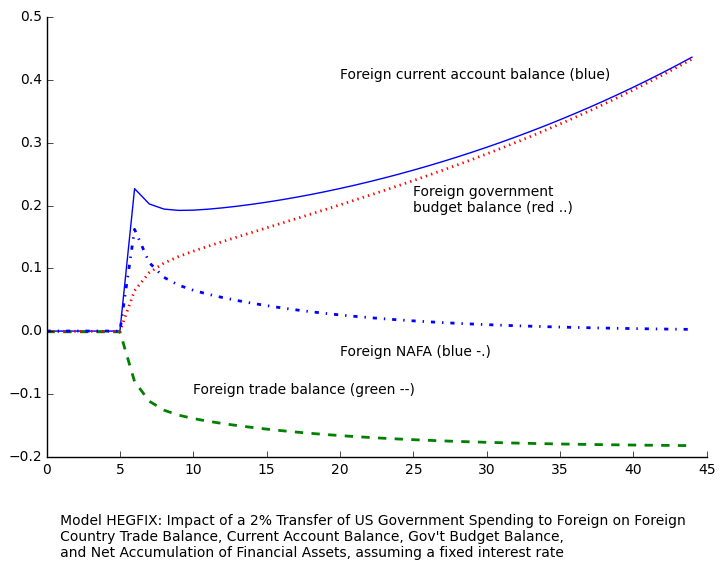

In [82]:
 caption = '''
    Model HEGFIX: Impact of a 2% Transfer of US Government Spending to Foreign on Foreign 
    Country Trade Balance, Current Account Balance, Gov't Budget Balance,
    and Net Accumulation of Financial Assets, assuming a fixed interest rate'''
cabdata = [s['CABUK'] for s in eps0.solutions[5:50]]
xidata = [s['XUK'] - s['IMUK'] for s in eps0.solutions[5:50]]
psbrdata = [-s['PSBRUK'] for s in eps0.solutions[5:50]]
nafadata = [s['NAFAUK'] for s in eps0.solutions[5:50]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(cabdata, linestyle='-', color='b')
axes.plot(xidata, linestyle='--', linewidth=2, color='g')
axes.plot(psbrdata, linestyle=':', linewidth=2, color='r')
axes.plot(nafadata, linestyle='-.', linewidth=2, color='b')

# add labels
plt.text(20, 0.401, 'Foreign current account balance (blue)')
plt.text(10, -.1, 'Foreign trade balance (green --) ')
plt.text(25, 0.215, 'Foreign government')
plt.text(25, 0.19, 'budget balance (red ..)')
plt.text(20, -0.04, 'Foreign NAFA (blue -.)')
fig.text(0.1, -0.15, caption);

###### Figure 12.1B

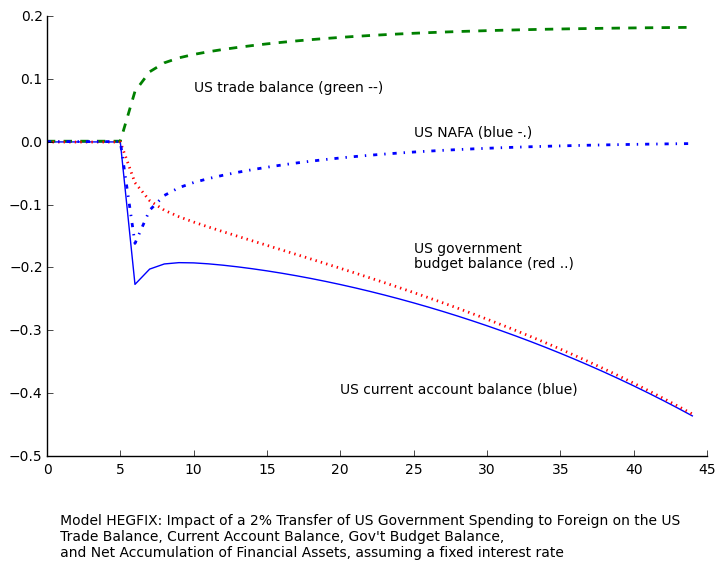

In [83]:
 caption = '''
    Model HEGFIX: Impact of a 2% Transfer of US Government Spending to Foreign on the US 
    Trade Balance, Current Account Balance, Gov't Budget Balance,
    and Net Accumulation of Financial Assets, assuming a fixed interest rate'''
cabdata = [s['CABUS'] for s in eps0.solutions[5:50]]
xidata = [s['XUS'] - s['IMUS'] for s in eps0.solutions[5:50]]
psbrdata = [-s['PSBRUS'] for s in eps0.solutions[5:50]]
nafadata = [s['NAFAUS'] for s in eps0.solutions[5:50]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(cabdata, linestyle='-', color='b')
axes.plot(xidata, linestyle='--', linewidth=2, color='g')
axes.plot(psbrdata, linestyle=':', linewidth=2, color='r')
axes.plot(nafadata, linestyle='-.', linewidth=2, color='b')

# add labels
plt.text(25, 0.0092, 'US NAFA (blue -.)')
plt.text(10, .08, 'US trade balance (green --) ')
plt.text(25, -.175, 'US government')
plt.text(25, -.2, 'budget balance (red ..)')
plt.text(20, -0.4, 'US current account balance (blue)')
fig.text(0.1, -0.15, caption);

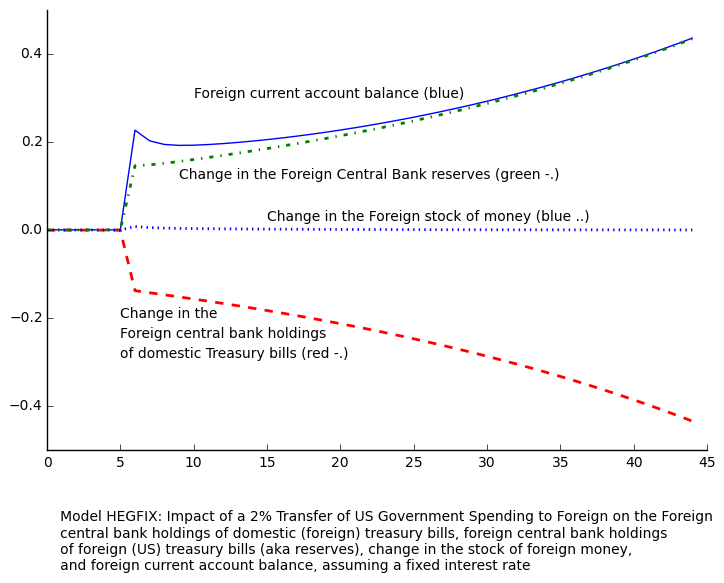

In [84]:
 caption = '''
    Model HEGFIX: Impact of a 2% Transfer of US Government Spending to Foreign on the Foreign 
    central bank holdings of domestic (foreign) treasury bills, foreign central bank holdings 
    of foreign (US) treasury bills (aka reserves), change in the stock of foreign money, 
    and foreign current account balance, assuming a fixed interest rate'''
cabdata = list()
ukukdata = list()
hukdata = list()
ukusdata = list()

for i in xrange(5, 50):
    s = eps0.solutions[i]
    s_1 = eps0.solutions[i-1]

    cabdata.append(s['CABUK'])
    ukukdata.append(s['BcbdUKUK'] - s_1['BcbdUKUK'])
    hukdata.append(s['HdUK'] - s_1['HdUK'])
    ukusdata.append(s['BcbdUKUS'] - s_1['BcbdUKUS'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
    
axes.plot(cabdata, linestyle='-', color='b')
axes.plot(ukukdata, linestyle='--', linewidth=2, color='r')
axes.plot(hukdata, linestyle=':', linewidth=2)
axes.plot(ukusdata, linestyle='-.', linewidth=2, color='g')

# add labelsa
plt.text(10, .3, 'Foreign current account balance (blue)')
plt.text(5, -0.2, 'Change in the')
plt.text(5, -.245, 'Foreign central bank holdings')
plt.text(5, -.29, 'of domestic Treasury bills (red -.)')
plt.text(15, 0.02, 'Change in the Foreign stock of money (blue ..)')
plt.text(9, 0.115, 'Change in the Foreign Central Bank reserves (green -.)')
fig.text(0.1, -.2, caption);

###### Figure 12.1C

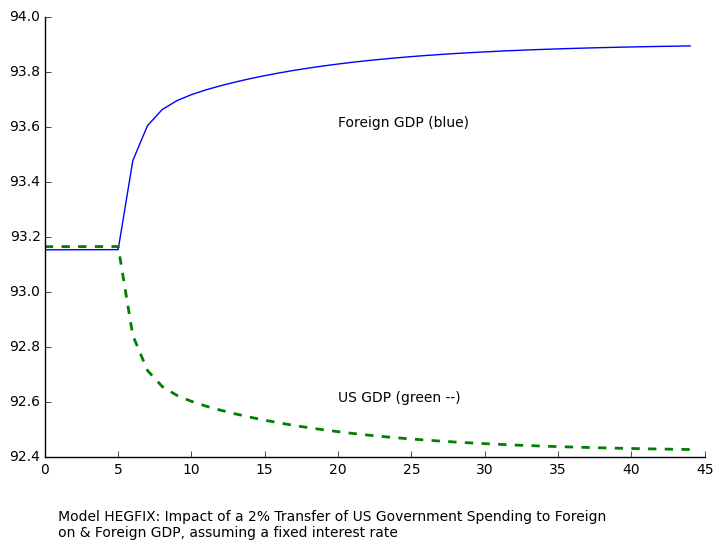

In [85]:
 caption = '''
    Model HEGFIX: Impact of a 2% Transfer of US Government Spending to Foreign 
    on & Foreign GDP, assuming a fixed interest rate'''
usdata = [s['YUS'] for s in eps0.solutions[5:50]]
ukdata = [s['YUK'] for s in eps0.solutions[5:50]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(37, 45)

axes.plot(ukdata, linestyle='-', color='b')
axes.plot(usdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(20,92.6,  'US GDP (green --)')
plt.text(20,93.6, 'Foreign GDP (blue)')
fig.text(0.1, -.1, caption);

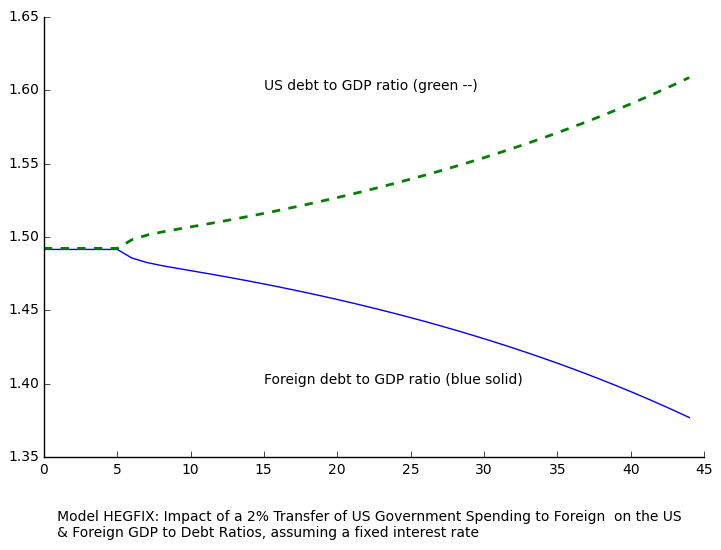

In [86]:
 caption = '''
    Model HEGFIX: Impact of a 2% Transfer of US Government Spending to Foreign  on the US 
    & Foreign GDP to Debt Ratios, assuming a fixed interest rate'''
usdata = [s['BsUS']/s['YUS'] for s in eps0.solutions[5:50]]
ukdata = [s['BsUK']/s['YUK'] for s in eps0.solutions[5:50]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(37, 45)

axes.plot(ukdata, linestyle='-', color='b')
axes.plot(usdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(15, 1.4, 'Foreign debt to GDP ratio (blue solid)')
plt.text(15, 1.6, 'US debt to GDP ratio (green --)')
fig.text(0.1, -.1, caption);

In [87]:
eps1 = create_openfix_model()
eps1.set_values(openfix_parameters)
eps1.set_values(openfix_exogenous)

for _ in xrange(10):
    eps1.solve(iterations=200, threshold=1e-4, method='broyden')

eps1.set_values({'gamma': 0.98, 'GkUS': 16.3265306122449, 'GUS': 15.61632653061224})

for _ in xrange(90):
    eps1.solve(iterations=200, threshold=1e-4, method='broyden')

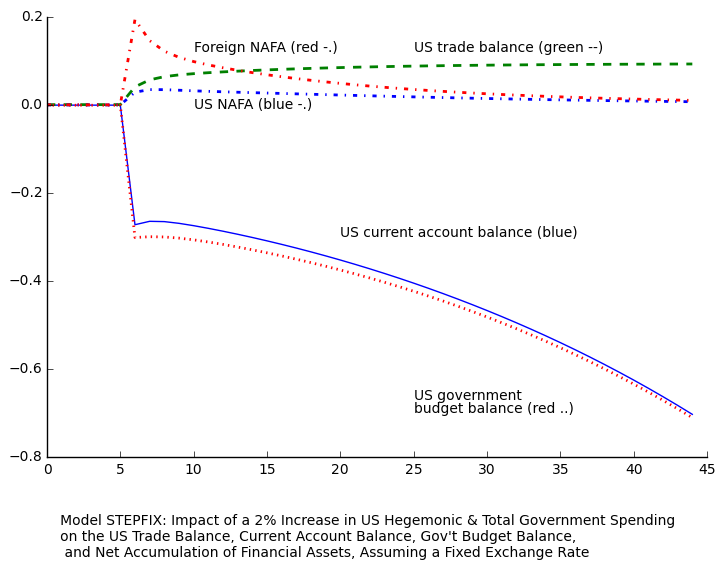

In [88]:
 caption = '''
    Model STEPFIX: Impact of a 2% Increase in US Hegemonic & Total Government Spending 
    on the US Trade Balance, Current Account Balance, Gov't Budget Balance,
     and Net Accumulation of Financial Assets, Assuming a Fixed Exchange Rate'''
cab2data = [s['CABUS'] for s in eps1.solutions[5:50]]
xi2data = [s['XUS'] - s['IMUS'] for s in eps1.solutions[5:50]]
psbr2data = [-s['PSBRUS'] for s in eps1.solutions[5:50]]
nafa2data = [s['NAFAUS'] for s in eps1.solutions[5:50]]
nafa3data = [s['NAFAUK'] for s in eps1.solutions[5:50]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(cab2data, linestyle='-', color='b')
axes.plot(xi2data, linestyle='--', linewidth=2, color='g')
axes.plot(psbr2data, linestyle=':', linewidth=2, color='r')
axes.plot(nafa2data, linestyle='-.', linewidth=2, color='b')
axes.plot(nafa3data, linestyle= '-.', linewidth=2, color='r')
# add labels
plt.text(25, 0.12, 'US trade balance (green --)')
plt.text(10, 0.12, 'Foreign NAFA (red -.)')
plt.text(10, -.0098, 'US NAFA (blue -.)')
plt.text(25, -.67, 'US government')
plt.text(25, -.7, 'budget balance (red ..)')
plt.text(20, -0.3, 'US current account balance (blue)')
fig.text(0.1, -0.15, caption);

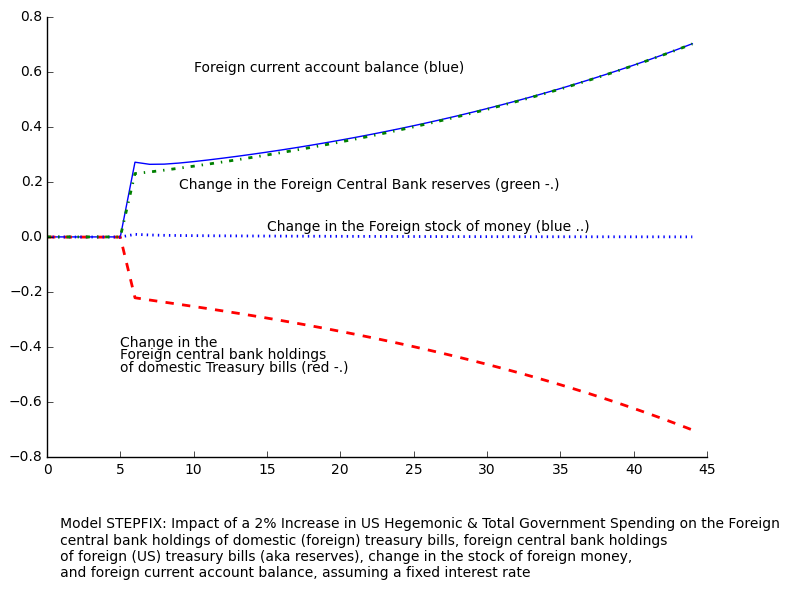

In [89]:
 caption = '''
    Model STEPFIX: Impact of a 2% Increase in US Hegemonic & Total Government Spending on the Foreign 
    central bank holdings of domestic (foreign) treasury bills, foreign central bank holdings 
    of foreign (US) treasury bills (aka reserves), change in the stock of foreign money, 
    and foreign current account balance, assuming a fixed interest rate'''
cab2data = list()
ukuk2data = list()
huk2data = list()
ukus2data = list()

for i in xrange(5, 50):
    s = eps1.solutions[i]
    s_1 = eps1.solutions[i-1]

    cab2data.append(s['CABUK'])
    ukuk2data.append(s['BcbdUKUK'] - s_1['BcbdUKUK'])
    huk2data.append(s['HdUK'] - s_1['HdUK'])
    ukus2data.append(s['BcbdUKUS'] - s_1['BcbdUKUS'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
    
axes.plot(cab2data, linestyle='-', color='b')
axes.plot(ukuk2data, linestyle='--', linewidth=2, color='r')
axes.plot(huk2data, linestyle=':', linewidth=2)
axes.plot(ukus2data, linestyle='-.', linewidth=2, color='g')

# add labelsa
plt.text(10, .6, 'Foreign current account balance (blue)')
plt.text(5, -0.4, 'Change in the')
plt.text(5, -.445, 'Foreign central bank holdings')
plt.text(5, -.49, 'of domestic Treasury bills (red -.)')
plt.text(15, 0.02, 'Change in the Foreign stock of money (blue ..)')
plt.text(9, 0.175, 'Change in the Foreign Central Bank reserves (green -.)')
fig.text(0.1, -.2, caption);

# caption = '''
    Model STEPFIX: Impact of a 2% increase in US Total Government Spending on the Foreign 
    Country Trade Balance, Current Account Balance, Gov't Budget Balance,
    and Net Accumulation of Financial Assets, Assuming a Fixed Exchange Rate'''
cabdata = [s['CABUK'] for s in eps1.solutions[5:]]
xidata = [s['XUK'] - s['IMUK'] for s in eps1.solutions[5:]]
psbrdata = [s['PSBRUK'] for s in eps1.solutions[5:]]
nafadata = [s['NAFAUK'] for s in eps1.solutions[5:50]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(cabdata, linestyle='-', color='b')
axes.plot(xidata, linestyle='--', linewidth=2, color='g')
axes.plot(psbrdata, linestyle=':', linewidth=2, color='r')
axes.plot(nafadata, linestyle='-.', linewidth=2, color='b')
axes.set_ylim(-1, 1)
# add labels
plt.text(28, 0.35, 'Foreign current account balance (blue solid)')
plt.text(40, -0.25, 'Foreign trade balance (green --)')
plt.text(5, -0.7, 'Foreign budget deficit (red ..)')
plt.text(7, -.03, 'Foreign NAFA (blue -.)')
fig.text(0.1, -.15, caption);

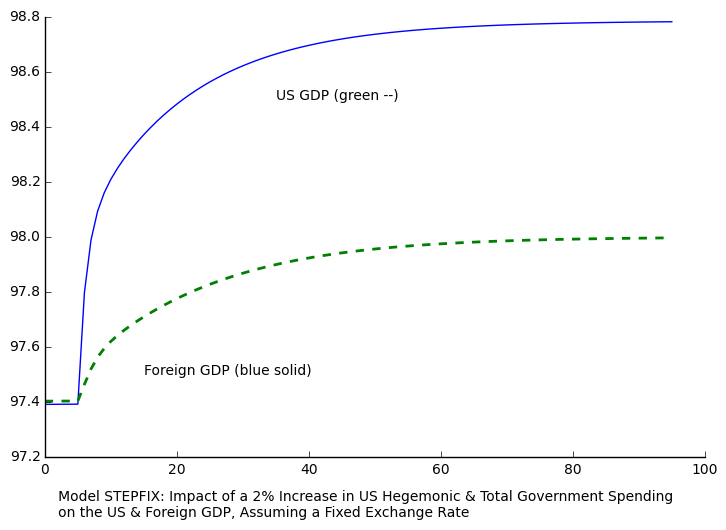

In [90]:
 caption = '''
    Model STEPFIX: Impact of a 2% Increase in US Hegemonic & Total Government Spending
    on the US & Foreign GDP, Assuming a Fixed Exchange Rate'''
ukdata = [s['YkUK'] for s in eps1.solutions[5:]]
usdata = [s['YkUS'] for s in eps1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(ukdata, linestyle='-', color='b')
axes.plot(usdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(35, 98.5, 'US GDP (green --)')
plt.text(15, 97.5, 'Foreign GDP (blue solid)')
fig.text(0.1, -.05, caption);

EXCHANGE RATE DON'T CHANGE

PRICES DON'T CHANGE

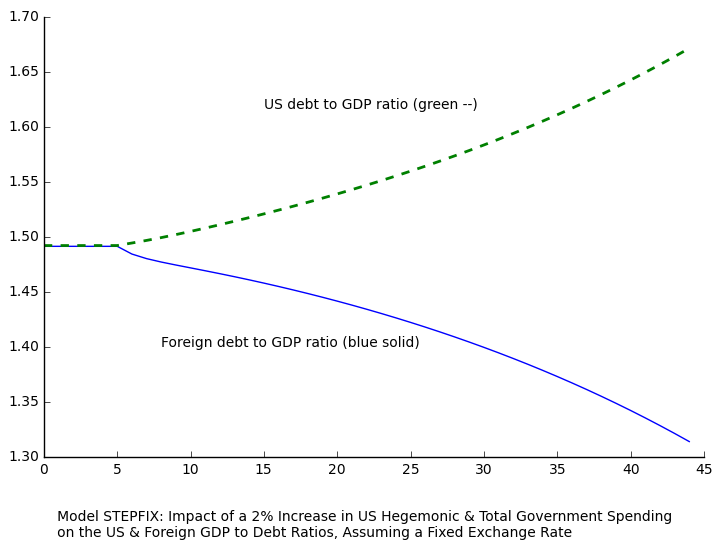

In [91]:
 caption = '''
    Model STEPFIX: Impact of a 2% Increase in US Hegemonic & Total Government Spending
    on the US & Foreign GDP to Debt Ratios, Assuming a Fixed Exchange Rate'''
usdata = [s['BsUS']/s['YUS'] for s in eps1.solutions[5:50]]
ukdata = [s['BsUK']/s['YUK'] for s in eps1.solutions[5:50]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#

axes.plot(ukdata, linestyle='-', color='b')
axes.plot(usdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(8, 1.40, 'Foreign debt to GDP ratio (blue solid)')
plt.text(15, 1.616, 'US debt to GDP ratio (green --)')
fig.text(0.1, -.1, caption);

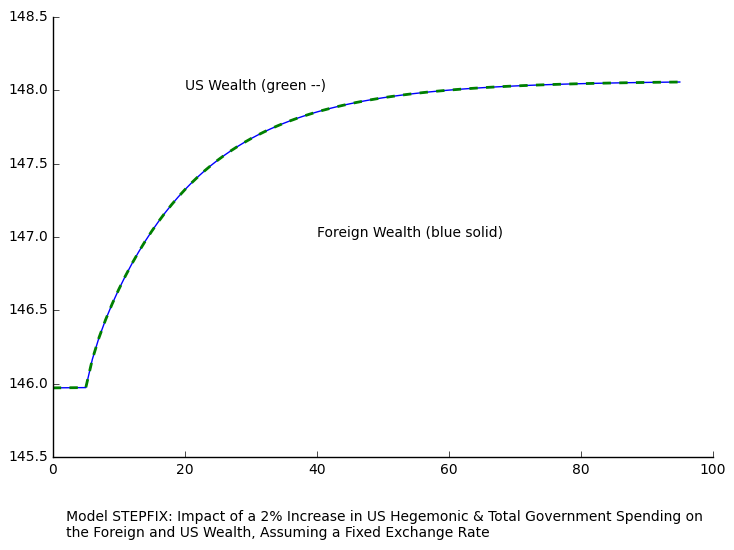

In [92]:
 caption = '''
    Model STEPFIX: Impact of a 2% Increase in US Hegemonic & Total Government Spending on 
    the Foreign and US Wealth, Assuming a Fixed Exchange Rate'''
dollardata = [s['VUK'] for s in eps1.solutions[5:]]
pounddata = [s['VUK'] for s in eps1.solutions[5:]]


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(0.24, 0.33)

axes.plot(dollardata, linestyle='-', color='b')
axes.plot(pounddata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(20, 148, 'US Wealth (green --)')
plt.text(40, 147, 'Foreign Wealth (blue solid)')
fig.text(0.1, -.1, caption);